In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string


In [168]:
driver_ids = pd.read_csv("data/driver_ids.csv")
ride_ids = pd.read_csv("data/ride_ids.csv")
ride_timestamps = pd.read_csv("data/ride_timestamps.csv")

In [169]:
ride_ids.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [170]:
driver_ids.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [171]:
ride_timestamps.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


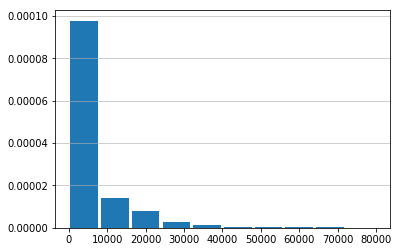

In [172]:
distance = ride_ids['ride_distance']
x,bins,p = plt.hist(ride_ids['ride_distance'], bins=10, range = [0,80000], rwidth = 0.9, density = True)
plt.grid(axis='y', alpha=0.75)

plt.show()

In [173]:
merged_rides = pd.merge(ride_ids, ride_timestamps, on='ride_id')
merged_rides

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,accepted_at,2016-04-23 02:14:15
2,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,arrived_at,2016-04-23 02:16:36
3,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,picked_up_at,2016-04-23 02:16:40
4,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,dropped_off_at,2016-04-23 02:22:07
5,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:00:49
6,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,accepted_at,2016-03-29 19:00:52
7,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,arrived_at,2016-03-29 19:03:57
8,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,picked_up_at,2016-03-29 19:04:01
9,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,dropped_off_at,2016-03-29 19:17:30


In [174]:
print(shape(driver_ids))
merged_rides['driver_id'][0]

(937, 2)


'002be0ffdc997bd5c50703158b7c2491'

In [175]:
def calculateFare(rides):
    base_fare = 2
    cpmile = 1.15
    cpminute = 0.22
    service_fee = 1.75
    min_fare = 5
    max_fare = 400
    
    fare = []
    for rows in rides.iterrows():
        value = base_fare + (rows[1]['ride_distance']/1609.34) * cpmile + (rows[1]['ride_duration']/60)*cpminute
        value = value + (value * rows[1]['ride_prime_time']/100) + service_fee 
        if value < min_fare:
            value = min_fare
        if value > max_fare:
            value = max_fare
        fare.append(value)
        
    rides['fare'] = fare
    

In [176]:
calculateFare(ride_ids)

In [177]:
ride_ids

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,fare
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.489653
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.118747
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.192580
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,77.861464
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,17.666316
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100,19.380355
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0,6.147795
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25,10.128440
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75,17.511270
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50,13.765382


In [178]:
def calculateDriverValue(driverID):
    all_driver_fare = []
    for row in driverID.iterrows():
        driver_all_rides = ride_ids[ride_ids['driver_id'] == row[1]['driver_id']]
        driver_all_fares = 0
        for row2 in driver_all_rides.iterrows():
            driver_all_fares = driver_all_fares + row2[1]['fare']
        all_driver_fare.append(driver_all_fares)
    driverID['total_fare'] = all_driver_fare
    return driverID

In [179]:
driver_with_value = calculateDriverValue(driver_ids)

In [180]:
merged_rides['timestamp'] = [str(x) for x in merged_rides['timestamp']]

In [181]:
import datetime
from datetime import datetime

In [182]:
x = merged_rides['timestamp'].apply(str)

In [183]:
merged_rides_ex = merged_rides.loc[0:100]

In [184]:
merged_rides_ex

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,accepted_at,2016-04-23 02:14:15
2,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,arrived_at,2016-04-23 02:16:36
3,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,picked_up_at,2016-04-23 02:16:40
4,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,dropped_off_at,2016-04-23 02:22:07
5,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:00:49
6,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,accepted_at,2016-03-29 19:00:52
7,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,arrived_at,2016-03-29 19:03:57
8,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,picked_up_at,2016-03-29 19:04:01
9,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,dropped_off_at,2016-03-29 19:17:30


In [185]:
def add_date_column(merged_rides):
    date = []
    for row in merged_rides.iterrows():
        row_date = row[1]['timestamp'].split()[0]
        date.append(row_date)
    return date

In [186]:
def add_time_column(merged_rides):
    time = []
    for row in merged_rides.iterrows():
        if len(row[1]['timestamp'].split()) > 1 :
            row_time = row[1]['timestamp'].split()[1]
            time.append(row_time)
        else:
            time.append(0)
    return time

In [187]:
a = merged_rides.loc[0]

In [188]:
a['timestamp'].split()[1]

'02:13:50'

In [189]:
date = add_date_column(merged_rides)

In [190]:
merged_rides['date'] = date

In [191]:
time = add_time_column(merged_rides)

In [192]:
merged_rides['time'] = time

In [193]:
def add_y_m_d_columns(merged_rides):
    merged_rides[['year','month','day']] = merged_rides['date'].astype(str).str.split('-', expand=True).astype(float)

In [194]:
def add_hr_min_sec_columns(merged_rides):
    merged_rides[['hr','min','sec']] = merged_rides['time'].astype(str).str.split(':', expand=True).astype(float)

In [195]:
add_y_m_d_columns(merged_rides)

In [196]:
add_hr_min_sec_columns(merged_rides)

In [197]:
merged_rides.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,date,time,year,month,day,hr,min,sec
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:13:50,2016-04-23,02:13:50,2016.0,4.0,23.0,2.0,13.0,50.0
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,accepted_at,2016-04-23 02:14:15,2016-04-23,02:14:15,2016.0,4.0,23.0,2.0,14.0,15.0
2,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,arrived_at,2016-04-23 02:16:36,2016-04-23,02:16:36,2016.0,4.0,23.0,2.0,16.0,36.0
3,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,picked_up_at,2016-04-23 02:16:40,2016-04-23,02:16:40,2016.0,4.0,23.0,2.0,16.0,40.0
4,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,dropped_off_at,2016-04-23 02:22:07,2016-04-23,02:22:07,2016.0,4.0,23.0,2.0,22.0,7.0


In [198]:
accepted_times = merged_rides[merged_rides['event']=='accepted_at']
pickup_times = merged_rides[merged_rides['event']=='picked_up_at']

In [199]:
accepted_times.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,date,time,year,month,day,hr,min,sec
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,accepted_at,2016-04-23 02:14:15,2016-04-23,02:14:15,2016.0,4.0,23.0,2.0,14.0,15.0
6,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,accepted_at,2016-03-29 19:00:52,2016-03-29,19:00:52,2016.0,3.0,29.0,19.0,0.0,52.0
11,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,accepted_at,2016-06-21 11:56:39,2016-06-21,11:56:39,2016.0,6.0,21.0,11.0,56.0,39.0
16,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,accepted_at,2016-05-19 09:15:33,2016-05-19,09:15:33,2016.0,5.0,19.0,9.0,15.0,33.0
21,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,accepted_at,2016-04-20 22:05:32,2016-04-20,22:05:32,2016.0,4.0,20.0,22.0,5.0,32.0


In [200]:
pickup_times.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,date,time,year,month,day,hr,min,sec
3,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,picked_up_at,2016-04-23 02:16:40,2016-04-23,02:16:40,2016.0,4.0,23.0,2.0,16.0,40.0
8,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,picked_up_at,2016-03-29 19:04:01,2016-03-29,19:04:01,2016.0,3.0,29.0,19.0,4.0,1.0
13,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,picked_up_at,2016-06-21 12:01:35,2016-06-21,12:01:35,2016.0,6.0,21.0,12.0,1.0,35.0
18,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,picked_up_at,2016-05-19 09:18:20,2016-05-19,09:18:20,2016.0,5.0,19.0,9.0,18.0,20.0
23,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,picked_up_at,2016-04-20 22:07:02,2016-04-20,22:07:02,2016.0,4.0,20.0,22.0,7.0,2.0


In [201]:
import time
from datetime import datetime as dt

accepted_timestamps = []
pickup_timestamps = [] 
for row in accepted_times.iterrows():
    time_string = row[1]['timestamp']
    timestamp = dt.strptime(time_string, "%Y-%m-%d %H:%M:%S")
    accepted_timestamps.append(timestamp)
    
for row in pickup_times.iterrows():
    time_string = row[1]['timestamp']
    timestamp = dt.strptime(time_string, "%Y-%m-%d %H:%M:%S")
    pickup_timestamps.append(timestamp)

In [202]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
#     print(h,m,s)
    return int(h) * 3600 + int(m) * 60 + int(s)

accepted_timestamps = np.array(accepted_timestamps)
pickup_timestamps = np.array(pickup_timestamps)
accept_to_pickup = pickup_timestamps - accepted_timestamps

accept_to_pickup_strings = [] 
for timedelta in accept_to_pickup:
    try:
        accept_to_pickup_strings.append(get_sec(str(timedelta)))
    # if 1 day later
    except:
        accept_to_pickup_strings.append(3600*60*24)
    
print(accept_to_pickup_strings)

[145, 189, 296, 167, 90, 372, 67, 62, 679, 415, 262, 152, 74, 281, 208, 134, 57, 209, 161, 103, 166, 62, 77, 202, 171, 72, 280, 113, 150, 184, 35, 113, 224, 61, 164, 172, 117, 409, 463, 130, 147, 510, 247, 230, 161, 289, 263, 186, 138, 182, 68, 84, 102, 285, 225, 234, 27, 121, 81, 285, 148, 355, 295, 83, 118, 65, 34, 237, 242, 100, 300, 211, 198, 301, 243, 90, 199, 51, 92, 198, 86, 351, 144, 309, 105, 224, 241, 152, 120, 290, 411, 110, 137, 107, 63, 167, 171, 142, 243, 62, 133, 169, 97, 427, 63, 167, 257, 267, 140, 157, 84, 188, 146, 139, 120, 141, 154, 62, 198, 177, 368, 80, 437, 129, 119, 124, 187, 90, 61, 81, 285, 180, 81, 75, 447, 255, 234, 92, 137, 259, 44, 479, 181, 118, 45, 89, 142, 251, 190, 218, 110, 72, 140, 186, 371, 41, 168, 131, 133, 107, 127, 259, 252, 232, 293, 207, 83, 103, 30, 202, 77, 140, 68, 101, 172, 250, 380, 219, 45, 75, 150, 163, 89, 365, 177, 98, 98, 270, 138, 241, 64, 179, 75, 56, 247, 69, 268, 526, 343, 194, 140, 155, 205, 423, 194, 124, 131, 166, 126, 207, 2

In [203]:
accepted_times = pd.DataFrame(accepted_times)
accepted_times['accept_to_pickup_time'] = accept_to_pickup_strings

In [204]:
accepted_times.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,date,time,year,month,day,hr,min,sec,accept_to_pickup_time
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,accepted_at,2016-04-23 02:14:15,2016-04-23,02:14:15,2016.0,4.0,23.0,2.0,14.0,15.0,145
6,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,accepted_at,2016-03-29 19:00:52,2016-03-29,19:00:52,2016.0,3.0,29.0,19.0,0.0,52.0,189
11,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,accepted_at,2016-06-21 11:56:39,2016-06-21,11:56:39,2016.0,6.0,21.0,11.0,56.0,39.0,296
16,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,accepted_at,2016-05-19 09:15:33,2016-05-19,09:15:33,2016.0,5.0,19.0,9.0,15.0,33.0,167
21,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,accepted_at,2016-04-20 22:05:32,2016-04-20,22:05:32,2016.0,4.0,20.0,22.0,5.0,32.0,90


In [205]:
accept_to_pickup_time_df = pd.DataFrame(accepted_times[['ride_id','accept_to_pickup_time']])
accept_to_pickup_time_df

,ride_id,accept_to_pickup_time
1,006d61cf7446e682f7bc50b0f8a5bea5,145
6,01b522c5c3a756fbdb12e95e87507eda,189
11,029227c4c2971ce69ff2274dc798ef43,296
16,034e861343a63ac3c18a9ceb1ce0ac69,167
21,034f2e614a2f9fc7f1c2f77647d1b981,90
26,03d6b9d80b8a96135cb9b25178e9e203,372
31,04053c0ed21761e07f0b869cab5b7dd0,67
36,0534d432e0186625f623aaee57af98be,62
41,053a1621c0affcd2b9c517af5c2bc843,679
46,066e92c52f59486de56cd7b8716a4ca6,415


In [206]:
def driver_ids_add_date_column(driver_ids):
    date = []
    for row in driver_ids.iterrows():
        row_date = row[1]['driver_onboard_date'].split()[0]
        date.append(row_date)
    driver_ids['date'] = date
    
driver_ids_add_date_column(driver_ids)


In [207]:
def add_y_m_d_columns(merged_rides):
    merged_rides[['year','month','day']] = merged_rides['date'].astype(str).str.split('-', expand=True).astype(float)
    
add_y_m_d_columns(driver_ids)
driver_ids

,driver_id,driver_onboard_date,total_fare,date,year,month,day
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3560.926071,2016-03-29,2016.0,3.0,29.0
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,321.494948,2016-03-29,2016.0,3.0,29.0
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,482.428390,2016-04-05,2016.0,4.0,5.0
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2610.871561,2016-04-23,2016.0,4.0,23.0
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,5381.097539,2016-04-29,2016.0,4.0,29.0
5,01788cf817698fe68eaecd7eb18b2f72,2016-05-06 00:00:00,0.000000,2016-05-06,2016.0,5.0,6.0
6,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00,2941.160242,2016-04-07,2016.0,4.0,7.0
7,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00,686.242111,2016-05-07,2016.0,5.0,7.0
8,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00,4279.871375,2016-04-26,2016.0,4.0,26.0
9,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00,5197.530993,2016-05-06,2016.0,5.0,6.0


In [208]:
ride_ids_sorted = merged_rides.sort_values(by='date', ascending=False)
driver_last_dates = ride_ids_sorted.drop_duplicates('driver_id', keep='first')
driver_last_dates.reset_index(drop = True)
driver_last_dates.sort_values(by='driver_id')
driver_last_dates = driver_last_dates.merge(accept_to_pickup_time_df, on='ride_id')

In [209]:
driver_last_dates.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,date,time,year,month,day,hr,min,sec,accept_to_pickup_time
0,7c1478b12207107ae4296e656a49d6f6,72f0fa0bd86800e9da5c4dced32c8735,4430,850,75,arrived_at,nan,nan,0,NaN,NaN,NaN,0.0,NaN,NaN,300
1,5943b68c2fa8bcfd0add30691fd9136b,bf49073d4b4369bb0e08a2d36e1cd097,23035,1163,0,dropped_off_at,2016-06-27 00:20:32,2016-06-27,00:20:32,2016.0,6.0,27.0,0.0,20.0,32.0,387
2,689bdf87fb2de49f98bf4946cfaa5068,cd44d244f302709c84f21c56de437504,2947,453,0,dropped_off_at,2016-06-27 00:07:54,2016-06-27,00:07:54,2016.0,6.0,27.0,0.0,7.0,54.0,324
3,ffff51a71f2f185ec5e97d59dbcd7a78,f90966687aebca6cc9efcd9e42897b75,20668,1469,0,arrived_at,2016-06-27 00:02:03,2016-06-27,00:02:03,2016.0,6.0,27.0,0.0,2.0,3.0,433
4,ec78920915122cbe500fcb475a8fb5d3,8a18c5c67f4a7bb8f1ee3f482eb61727,11262,713,0,dropped_off_at,2016-06-27 00:06:20,2016-06-27,00:06:20,2016.0,6.0,27.0,0.0,6.0,20.0,153


In [210]:
driver_lost_time_avg = pd.DataFrame(driver_last_dates.groupby('driver_id')['accept_to_pickup_time'].mean())
driver_lost_time_avg = driver_lost_time_avg.reset_index()
driver_lost_time_avg

,driver_id,accept_to_pickup_time
0,002be0ffdc997bd5c50703158b7c2491,118
1,007f0389f9c7b03ef97098422f902e62,202
2,011e5c5dfc5c2c92501b8b24d47509bc,269
3,0152a2f305e71d26cc964f8d4411add9,496
4,01674381af7edd264113d4e6ed55ecda,190
5,0213f8b59219e32142711992ca4ec01f,144
6,021e5cd15ef0bb3ec20a12af99e142b3,122
7,0258e250ca195cc6258cbdc75aecd853,80
8,028b5a4dcd7f4924ebfabcf2e814c014,700
9,02d6a6b8a6da15fc219a9570f7ebbe78,229


In [211]:
driver_primetime_avg = pd.DataFrame(ride_ids_sorted.groupby('driver_id')['ride_prime_time'].mean())

In [212]:
driver_primetime_avg = driver_primetime_avg.reset_index()


In [213]:
driver_primetime_avg.head()

,driver_id,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,19.404332
1,007f0389f9c7b03ef97098422f902e62,20.161290
2,011e5c5dfc5c2c92501b8b24d47509bc,19.852941
3,0152a2f305e71d26cc964f8d4411add9,10.732984
4,01674381af7edd264113d4e6ed55ecda,12.533333


In [214]:
display(driver_last_dates)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,date,time,year,month,day,hr,min,sec,accept_to_pickup_time
0,7c1478b12207107ae4296e656a49d6f6,72f0fa0bd86800e9da5c4dced32c8735,4430,850,75,arrived_at,nan,nan,0,NaN,NaN,NaN,0.0,NaN,NaN,300
1,5943b68c2fa8bcfd0add30691fd9136b,bf49073d4b4369bb0e08a2d36e1cd097,23035,1163,0,dropped_off_at,2016-06-27 00:20:32,2016-06-27,00:20:32,2016.0,6.0,27.0,0.0,20.0,32.0,387
2,689bdf87fb2de49f98bf4946cfaa5068,cd44d244f302709c84f21c56de437504,2947,453,0,dropped_off_at,2016-06-27 00:07:54,2016-06-27,00:07:54,2016.0,6.0,27.0,0.0,7.0,54.0,324
3,ffff51a71f2f185ec5e97d59dbcd7a78,f90966687aebca6cc9efcd9e42897b75,20668,1469,0,arrived_at,2016-06-27 00:02:03,2016-06-27,00:02:03,2016.0,6.0,27.0,0.0,2.0,3.0,433
4,ec78920915122cbe500fcb475a8fb5d3,8a18c5c67f4a7bb8f1ee3f482eb61727,11262,713,0,dropped_off_at,2016-06-27 00:06:20,2016-06-27,00:06:20,2016.0,6.0,27.0,0.0,6.0,20.0,153
5,55bec90600d21bd3513366d218f2b2f2,dbbe52211b1ed034fcb384a045229ff5,36818,2146,0,dropped_off_at,2016-06-27 00:31:23,2016-06-27,00:31:23,2016.0,6.0,27.0,0.0,31.0,23.0,127
6,0656192a402808805282e60761bda088,e51093e307953ecf29061fb83aee3081,3214,419,0,dropped_off_at,2016-06-27 00:05:27,2016-06-27,00:05:27,2016.0,6.0,27.0,0.0,5.0,27.0,189
7,8dbfef11a650dd9658ca0c6f70b84f88,311542541524c0d356fa8d7fc229baae,2546,388,25,dropped_off_at,2016-06-27 00:05:30,2016-06-27,00:05:30,2016.0,6.0,27.0,0.0,5.0,30.0,73
8,a4463e077e248abcd96b8ee584e7fec5,3259c38ec805a2b74611f5e9d53f140f,13181,4346,50,dropped_off_at,2016-06-27 00:50:50,2016-06-27,00:50:50,2016.0,6.0,27.0,0.0,50.0,50.0,21
9,e76529a86a5efc221a88a6c91a75ea59,ba31b0623e6f7c35033c107553376a35,8065,764,0,dropped_off_at,2016-06-27 00:04:29,2016-06-27,00:04:29,2016.0,6.0,27.0,0.0,4.0,29.0,170


In [215]:
driver_ids.sort_values(by='date', ascending=False)

,driver_id,driver_onboard_date,total_fare,date,year,month,day
822,df9ab418e87b21319bdfe389a4552e08,2016-05-15 00:00:00,5452.147617,2016-05-15,2016.0,5.0,15.0
926,fdbee494c73577d5b1266d1fec5c6c9a,2016-05-15 00:00:00,647.672620,2016-05-15,2016.0,5.0,15.0
720,bf2693c5774a77e478e418119be97c5c,2016-05-15 00:00:00,368.830225,2016-05-15,2016.0,5.0,15.0
165,2e5d7b104b570a5cf450f6825880c9dc,2016-05-15 00:00:00,469.844961,2016-05-15,2016.0,5.0,15.0
142,28a396a3e1793b64046aaaf8345604ec,2016-05-15 00:00:00,0.000000,2016-05-15,2016.0,5.0,15.0
909,f98673773627b4b8d152e2b168b85bb2,2016-05-15 00:00:00,577.513924,2016-05-15,2016.0,5.0,15.0
230,3e66ede2d283842c643b6b623d0ca168,2016-05-14 00:00:00,289.954408,2016-05-14,2016.0,5.0,14.0
106,1e9570c1846c0f79c1ec103f608bc8ee,2016-05-14 00:00:00,2911.207377,2016-05-14,2016.0,5.0,14.0
48,10ab4d373b29fb6ee31ae2b7b39fc574,2016-05-14 00:00:00,524.083663,2016-05-14,2016.0,5.0,14.0
61,136b51093f684e15e2798e4dc1e23d0c,2016-05-14 00:00:00,2120.085456,2016-05-14,2016.0,5.0,14.0


In [216]:
def driver_time_with_lyft(driver_ids):

    last_dates = []
    last_month = []
    last_day = []
    
    for row in driver_ids.iterrows():
        if len(driver_last_dates.loc[driver_last_dates['driver_id'] == row[1]['driver_id'],'month'])>0 & (len(driver_last_dates.loc[driver_last_dates['driver_id'] == row[1]['driver_id'],'day'])>0):
            last_month1 = driver_last_dates.loc[driver_last_dates['driver_id'] == row[1]['driver_id'],'month'].iloc[0]
            last_month.append(last_month1)
            last_day1 = driver_last_dates.loc[driver_last_dates['driver_id'] == row[1]['driver_id'],'day'].iloc[0]
            last_day.append(last_day1)
        else:
            last_month1 = 0
            last_month.append(last_month1)
            last_day1 = 0
            last_day.append(last_day1)
 
    return last_month,last_day

In [217]:
last_month,last_day = driver_time_with_lyft(driver_ids)
driver_ids['last_month'] = last_month
driver_ids['last_day'] = last_day

In [218]:
driver_ids

,driver_id,driver_onboard_date,total_fare,date,year,month,day,last_month,last_day
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3560.926071,2016-03-29,2016.0,3.0,29.0,6.0,23.0
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,321.494948,2016-03-29,2016.0,3.0,29.0,6.0,22.0
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,482.428390,2016-04-05,2016.0,4.0,5.0,6.0,12.0
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2610.871561,2016-04-23,2016.0,4.0,23.0,6.0,26.0
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,5381.097539,2016-04-29,2016.0,4.0,29.0,6.0,24.0
5,01788cf817698fe68eaecd7eb18b2f72,2016-05-06 00:00:00,0.000000,2016-05-06,2016.0,5.0,6.0,0.0,0.0
6,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00,2941.160242,2016-04-07,2016.0,4.0,7.0,5.0,7.0
7,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00,686.242111,2016-05-07,2016.0,5.0,7.0,6.0,25.0
8,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00,4279.871375,2016-04-26,2016.0,4.0,26.0,6.0,26.0
9,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00,5197.530993,2016-05-06,2016.0,5.0,6.0,6.0,26.0


In [219]:
import math
def time_with_lyft(driver_ids):
    months_passed = []
    days_passed = []
    for index,row in driver_ids.iterrows():
        if (math.isnan(row['last_month']) | math.isnan(row['month']) | math.isnan(row['last_day']) | math.isnan(row['day'])):
            row['last_month'] = 0
            row['month'] = 0
            row['last_day'] = 0   
            row['day'] = 0
            months = 0
            days = 0
        elif(int(row['last_month'])==0 | int(row['last_day'])==0):
            months = 0
            days = 0
        else:
            months = int(row['last_month']) - int(row['month'])
            days = months * 30 + int(row['last_day']) - int(row['day'])
        months_passed.append(months)
        days_passed.append(days)
    return days_passed,months_passed

In [220]:
days_passed, months_passed = time_with_lyft(driver_ids)
driver_ids['days_passed'] = days_passed
driver_ids = driver_ids.merge(driver_primetime_avg, on='driver_id')
driver_ids = driver_ids.merge(driver_lost_time_avg, on ='driver_id')

In [221]:
driver_ids

,driver_id,driver_onboard_date,total_fare,date,year,month,day,last_month,last_day,days_passed,ride_prime_time,accept_to_pickup_time
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3560.926071,2016-03-29,2016.0,3.0,29.0,6.0,23.0,84,19.404332,118
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,321.494948,2016-03-29,2016.0,3.0,29.0,6.0,22.0,83,20.161290,202
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,482.428390,2016-04-05,2016.0,4.0,5.0,6.0,12.0,67,19.852941,269
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2610.871561,2016-04-23,2016.0,4.0,23.0,6.0,26.0,63,10.732984,496
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,5381.097539,2016-04-29,2016.0,4.0,29.0,6.0,24.0,55,12.533333,190
5,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00,2941.160242,2016-04-07,2016.0,4.0,7.0,5.0,7.0,30,10.312500,144
6,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00,686.242111,2016-05-07,2016.0,5.0,7.0,6.0,25.0,48,22.641509,122
7,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00,4279.871375,2016-04-26,2016.0,4.0,26.0,6.0,26.0,60,11.589404,80
8,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00,5197.530993,2016-05-06,2016.0,5.0,6.0,6.0,26.0,50,10.950413,700
9,02d6a6b8a6da15fc219a9570f7ebbe78,2016-05-03 00:00:00,1566.074367,2016-05-03,2016.0,5.0,3.0,6.0,23.0,50,3.629032,229


In [222]:
average_lifetime = driver_ids['days_passed'].mean()

In [223]:
print(average_lifetime)

54.14097968936679


In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [225]:
X = driver_ids[['year','month','day', 'ride_prime_time', 'accept_to_pickup_time']]
y = driver_ids[['total_fare', 'days_passed']]
X.head()

,year,month,day,ride_prime_time,accept_to_pickup_time
0,2016.0,3.0,29.0,19.404332,118
1,2016.0,3.0,29.0,20.161290,202
2,2016.0,4.0,5.0,19.852941,269
3,2016.0,4.0,23.0,10.732984,496
4,2016.0,4.0,29.0,12.533333,190


In [226]:
y.head()

,total_fare,days_passed
0,3560.926071,84
1,321.494948,83
2,482.428390,67
3,2610.871561,63
4,5381.097539,55


In [227]:
print(X.shape, y.shape)

(837, 5) (837, 2)


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, y_test.shape)

(585, 5) (585, 2) (252, 2)


In [229]:
lm_lifetime= LinearRegression()
model_lifetime = lm_lifetime.fit(X_train, y_train['days_passed'])
lm_value = LinearRegression()
model_value = lm_value.fit(X_train, y_train['total_fare'])
print(lm_lifetime.score(X_test, y_test['days_passed']))
print(lm_value.score(X_test, y_test['total_fare']))

0.188589093665957
0.06851607955374339
